In [ ]:
import os
import numpy as np
import ultralytics
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


# Fine Tune Model

## Palm tree dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("palm-tree-rqdgv").project("apple_maturity-1ayzw-vhohy")
version = project.version(1)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Apple_maturity-1 in yolov11:: 100%|██████████| 2014/2014 [00:00<00:00, 10465.57it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 213MB/s]
New https://pypi.org/project/ultralytics/8.3.62 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Apple_maturity-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1737113432.8bcbbf1fdbbf.1265.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


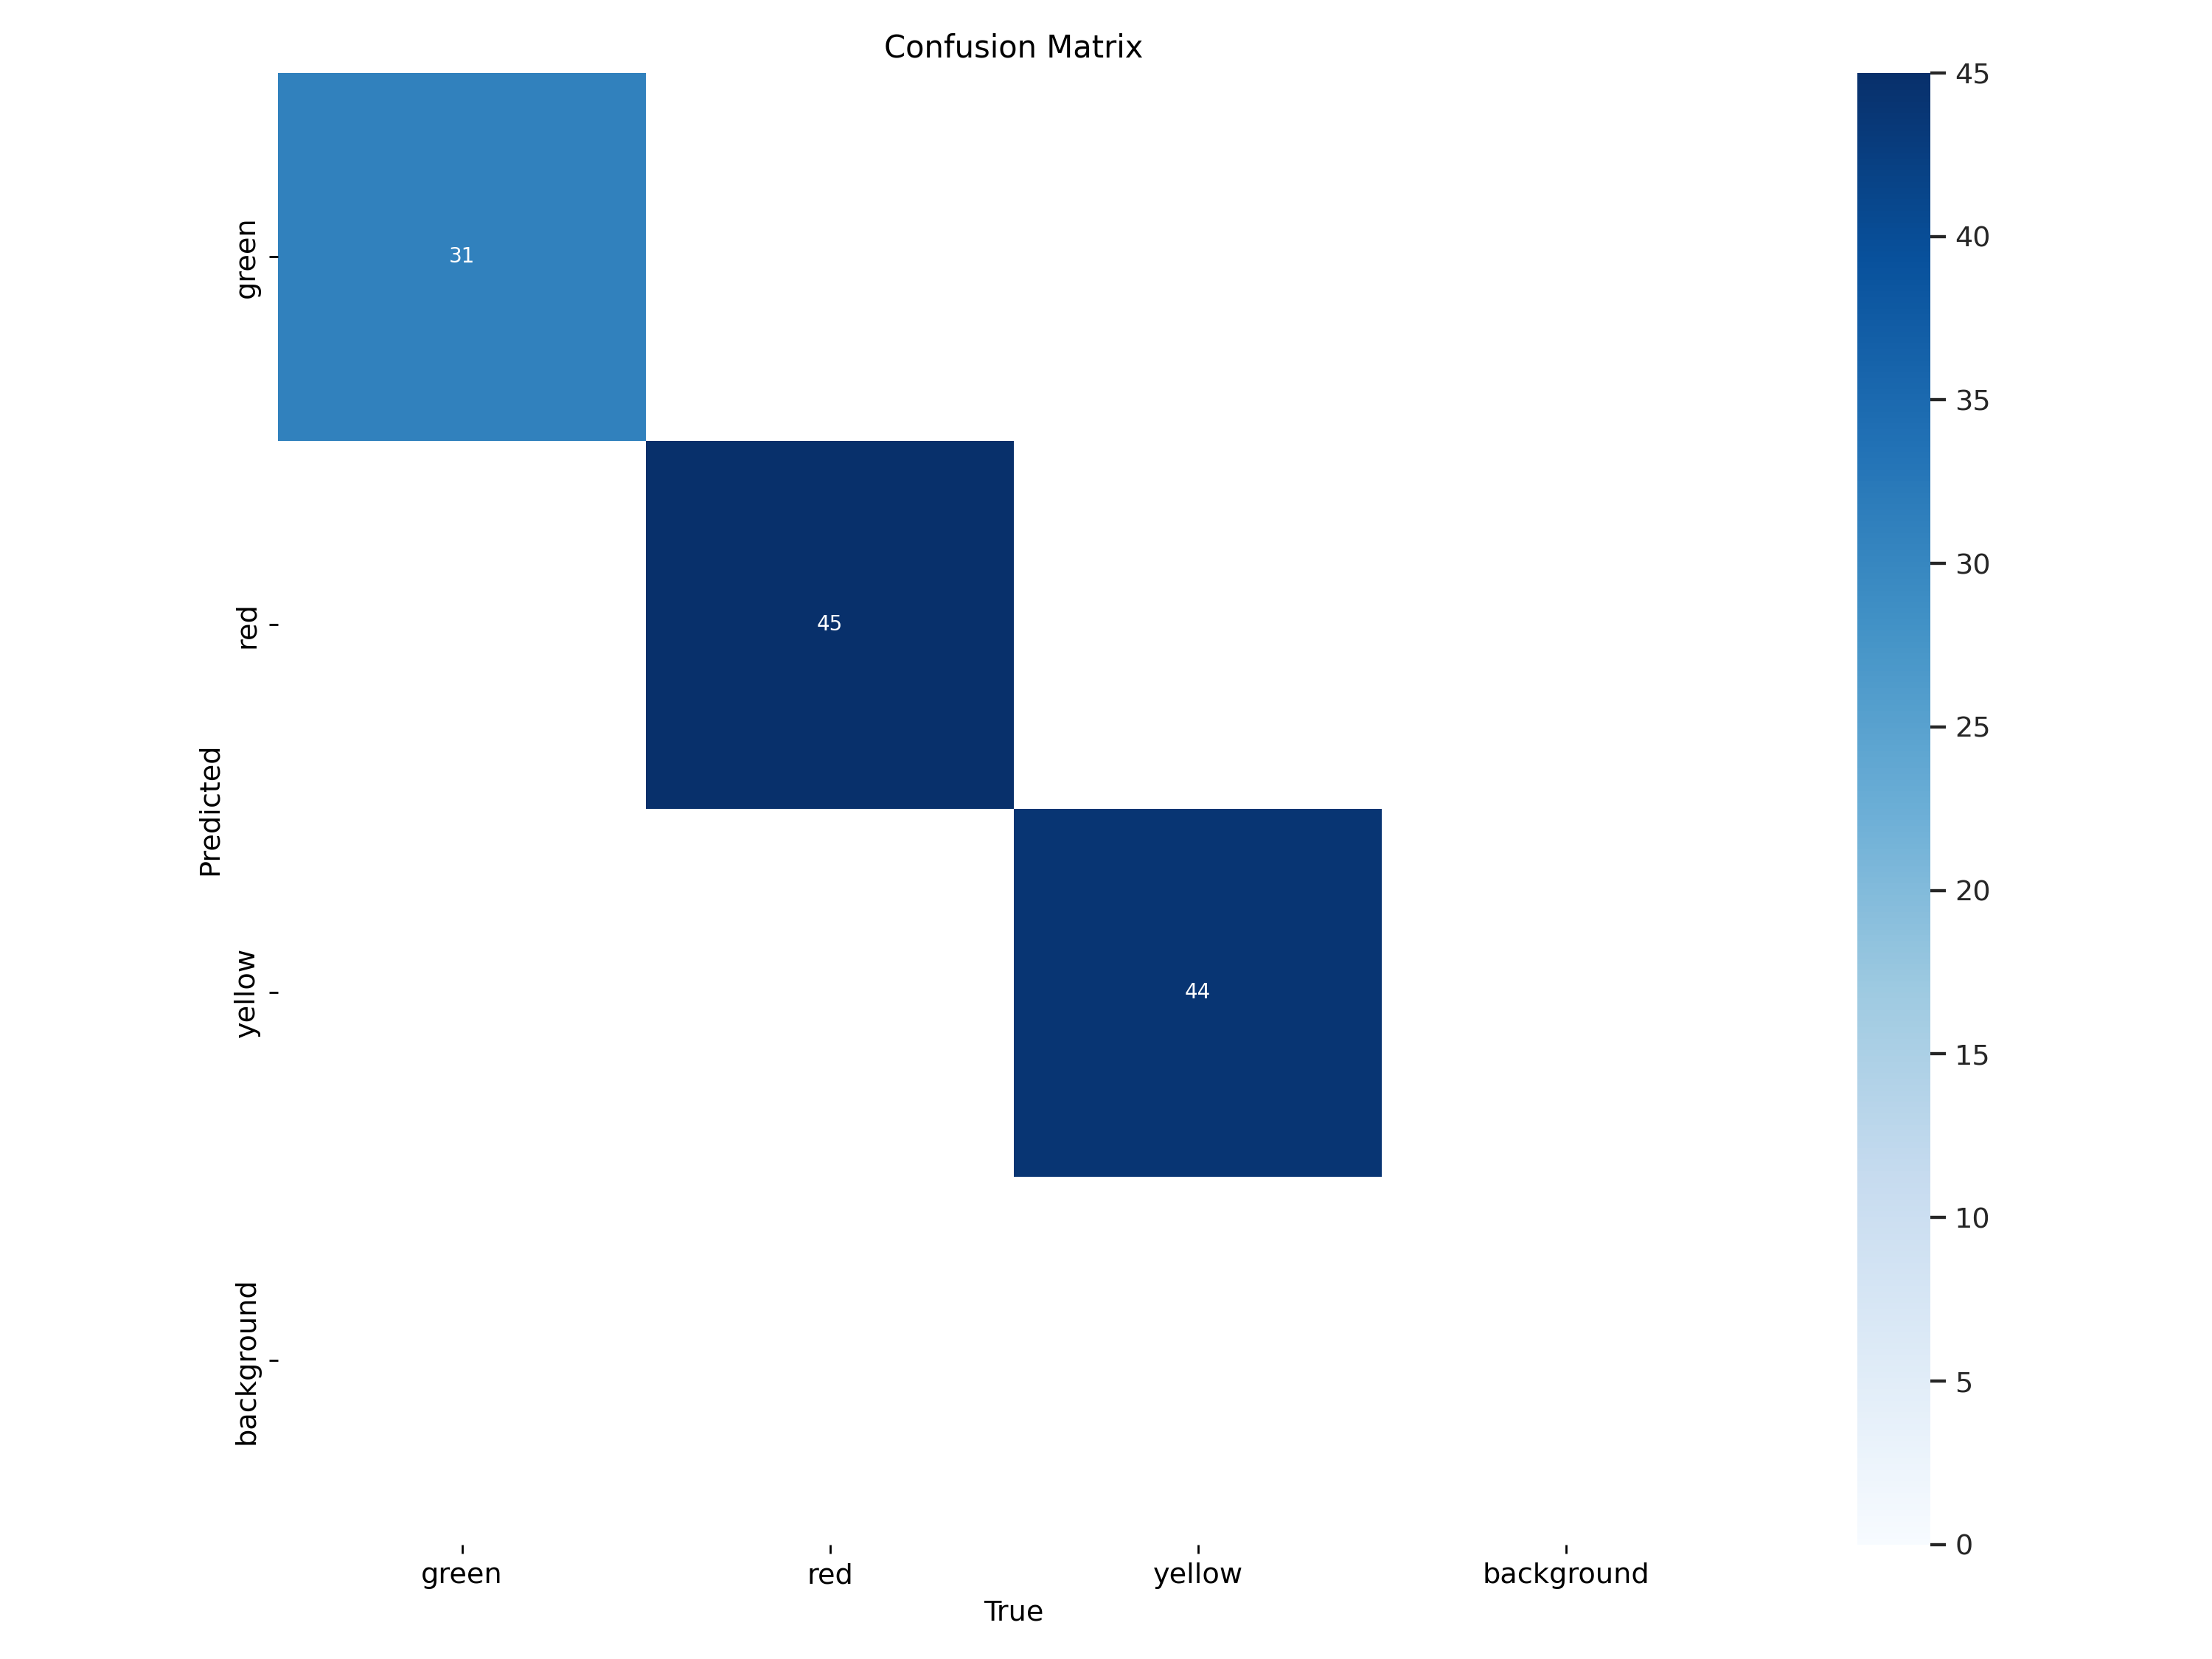

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

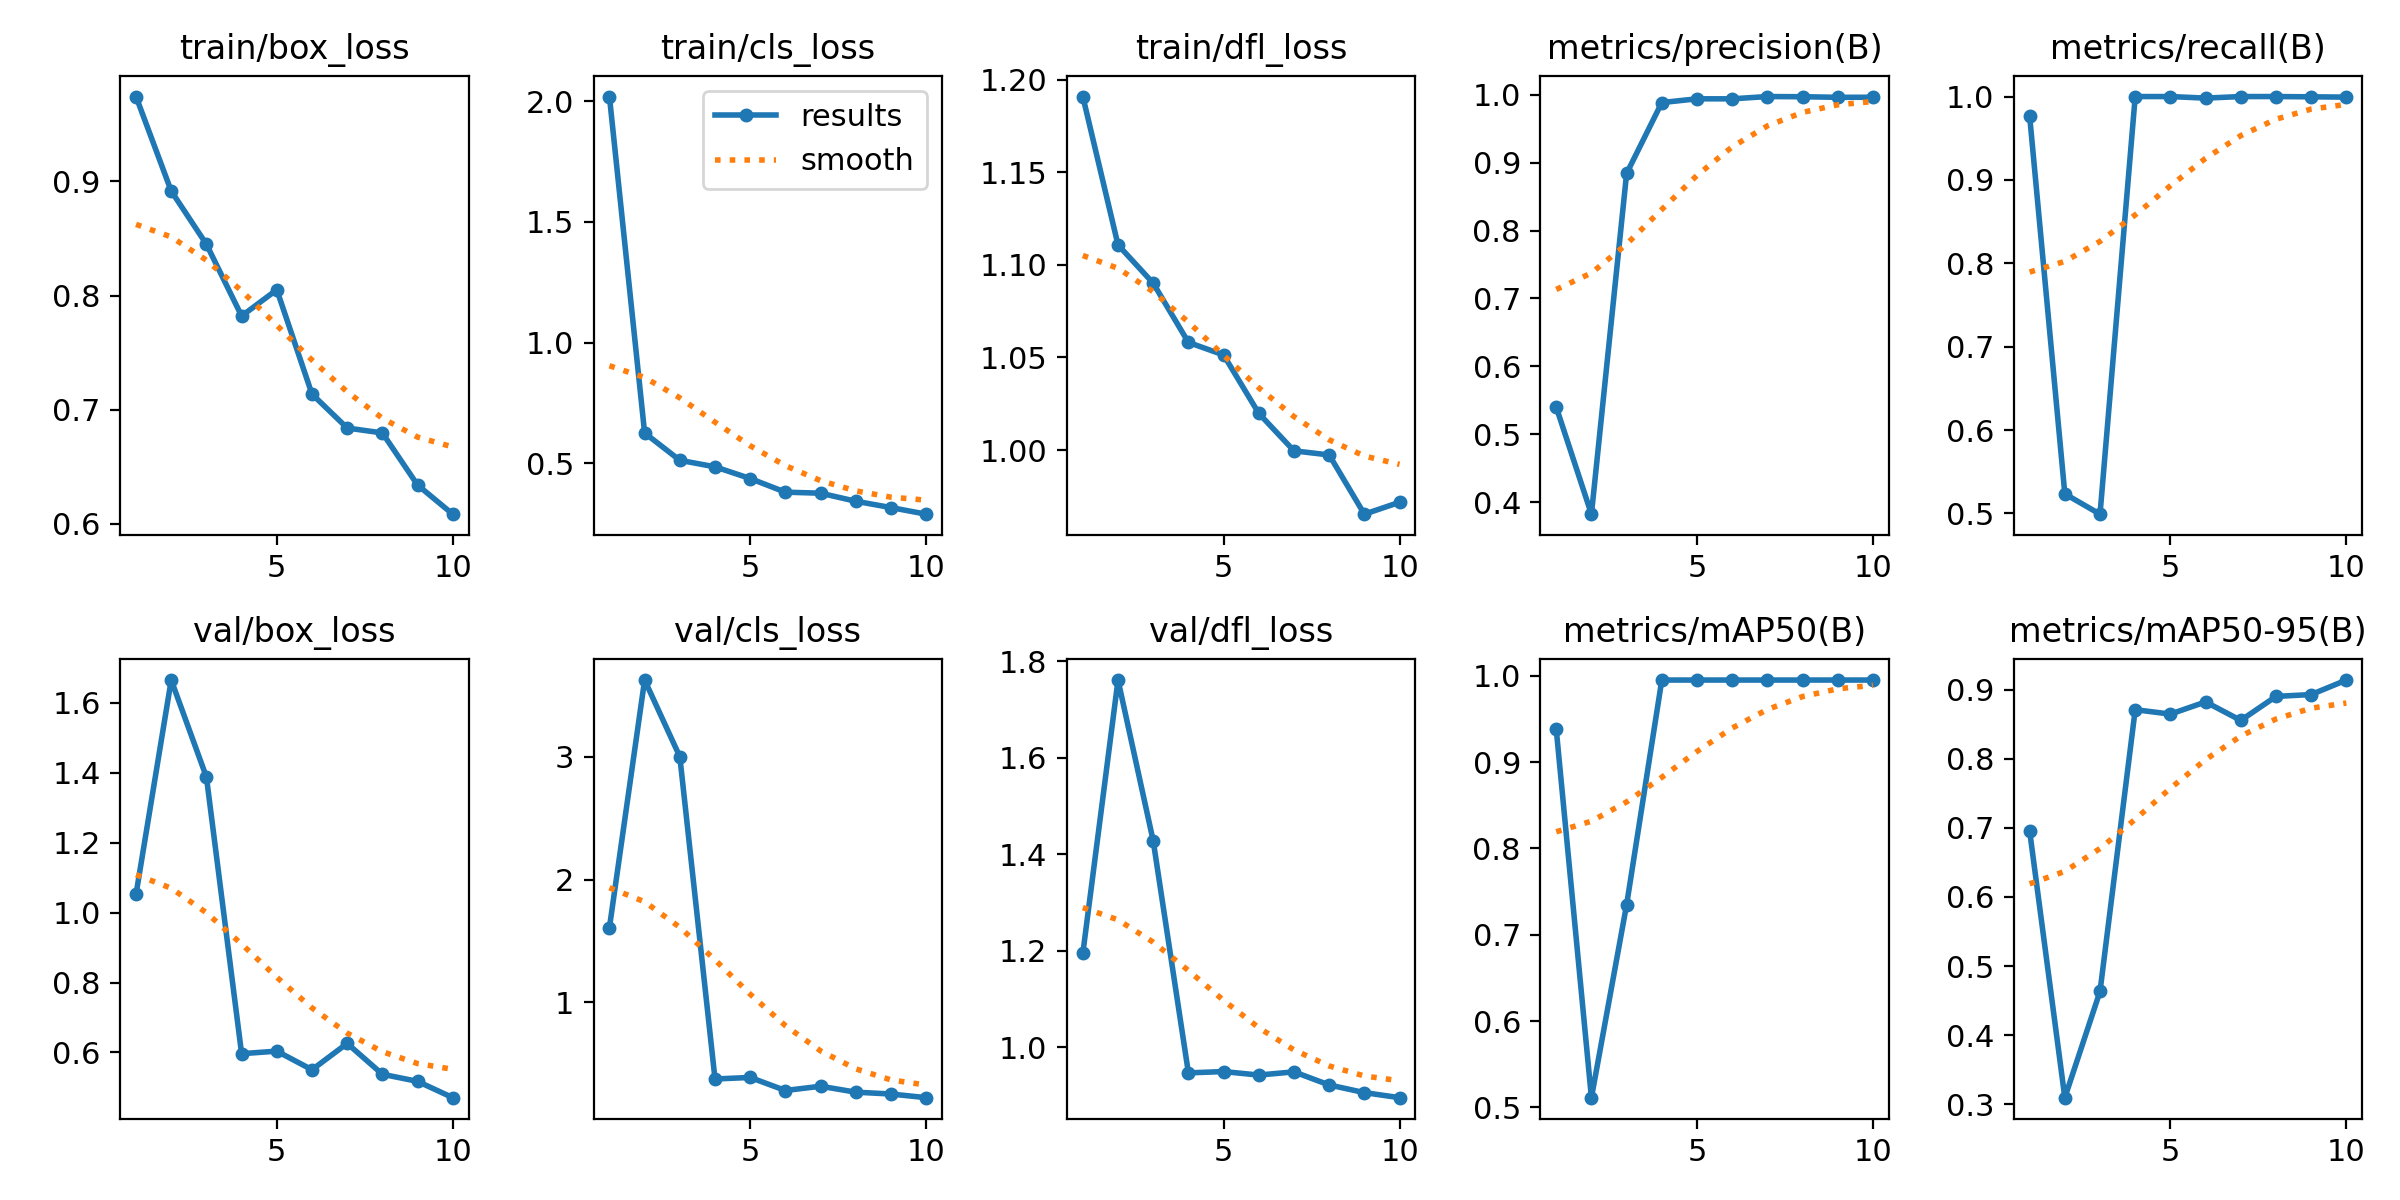

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Apple_maturity-1/valid/labels.cache... 83 images, 0 backgrounds, 0 corrupt: 100% 83/83 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.23it/s]
                   all         83        120      0.997      0.999      0.995      0.913
                 green         31         31      0.994          1      0.995      0.932
                   red         45         45      0.996          1      0.995      0.895
                yellow         44         44          1      0.998      0.995      0.913
Speed: 4.0ms preprocess, 11.1ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/42 /content/datasets/Apple_maturity-1/test/images/102_jpg.rf.73e0f803084fb14231867f50e11920f3.jpg: 640x640 1 green, 15.6ms
image 2/42 /content/datasets/Apple_maturity-1/test/images/105_jpg.rf.3599219c01a520535c0bc30a0aba2774.jpg: 640x640 1 green, 15.6ms
image 3/42 /content/datasets/Apple_maturity-1/test/images/118_jpg.rf.ddeeb01a73c28242839edba0a7c60c97.jpg: 640x640 1 green, 15.6ms
image 4/42 /content/datasets/Apple_maturity-1/test/images/131_jpg.rf.f6e04a9a8cffde1fa83a39bb32eda847.jpg: 640x640 1 green, 15.6ms
image 5/42 /content/datasets/Apple_maturity-1/test/images/152_jpg.rf.059de63168c3e377bd041cdf3a185ae4.jpg: 640x640 1 red, 15.6ms
image 6/42 /content/datasets/Apple_maturity-1/test/images/15_jpg.rf.ae446fb12bb9dff2531d8a07f6138223.jpg: 640x640 1 green, 1 red, 15.6ms
image 7/42 /content/datasets/Apple_maturity

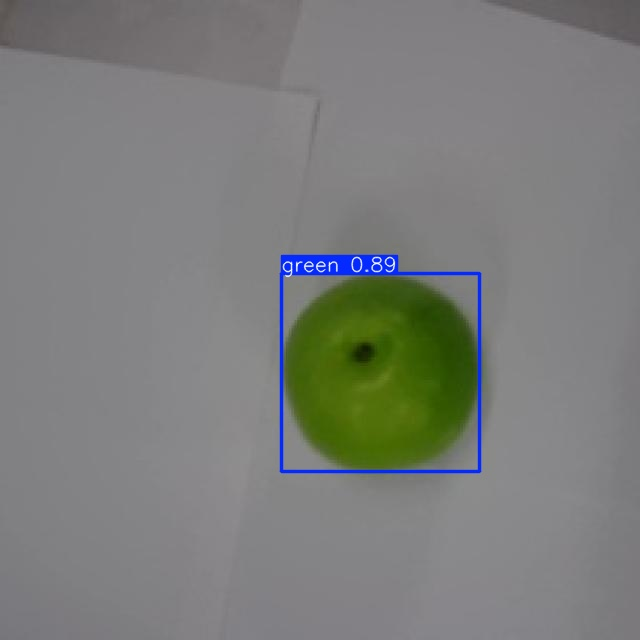

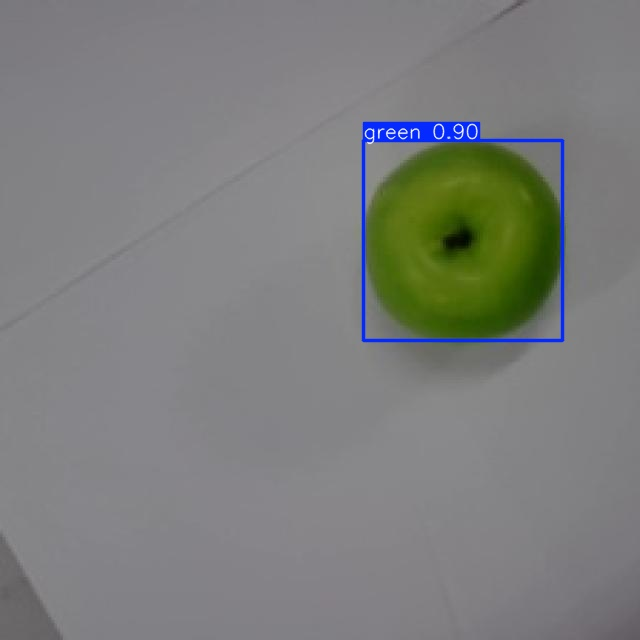

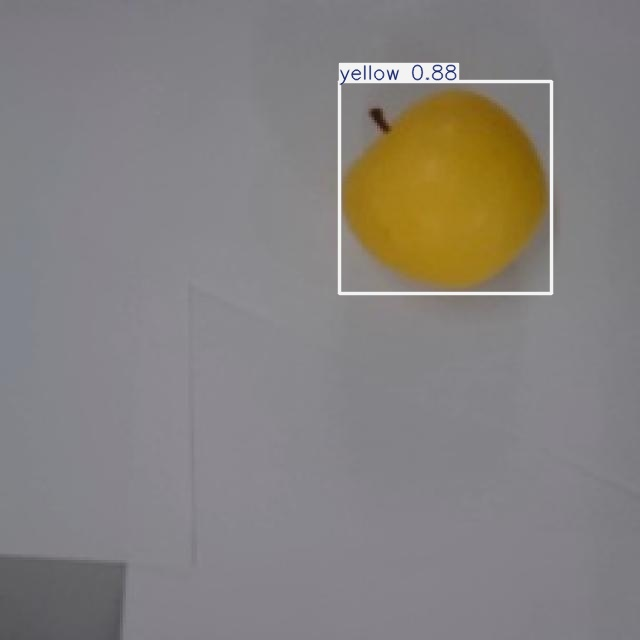

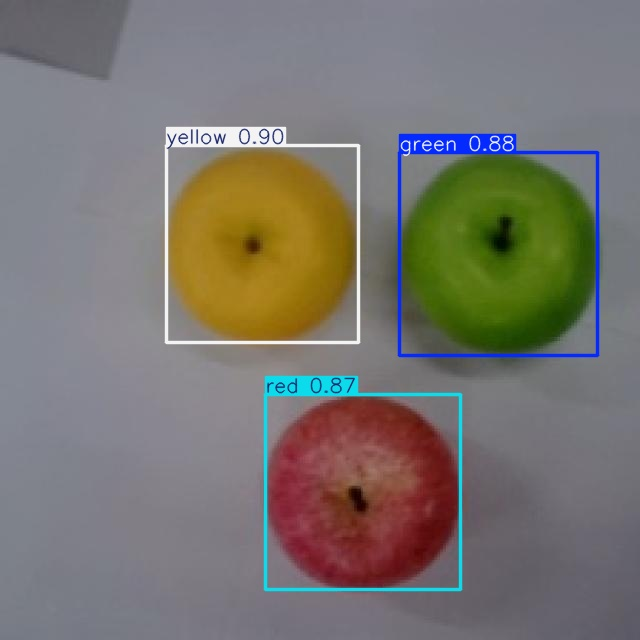

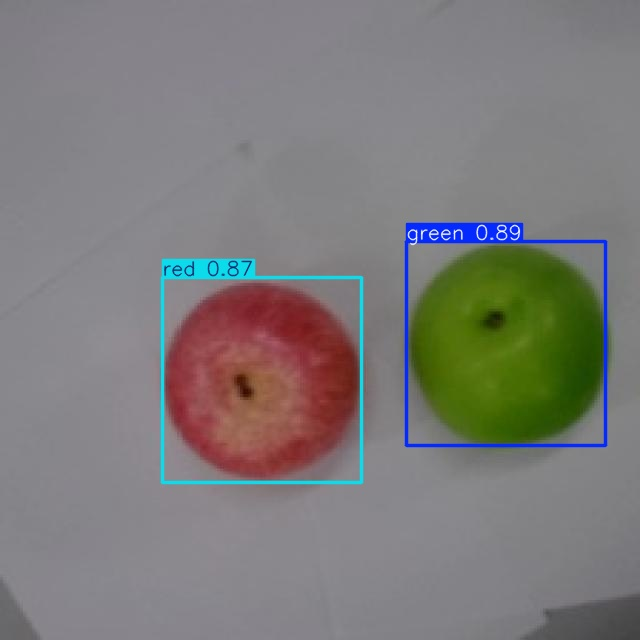

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(IPyImage(filename=img, width=640))
    print("\n")

# Testing

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

url = 'https://storage.googleapis.com/648010c1-f244-4641-98f2-73ff6c1b4e99/ai_assignment_20230726_classify.jpeg'

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
image = Image.open(requests.get(url, stream=True).raw)
result = model.predict(image, conf=0.4)[0]


0: 512x640 2 greens, 7 reds, 6 yellows, 13.0ms
Speed: 3.3ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
result.boxes.xyxy

In [ ]:
result.boxes.conf

In [ ]:
result.boxes.cls

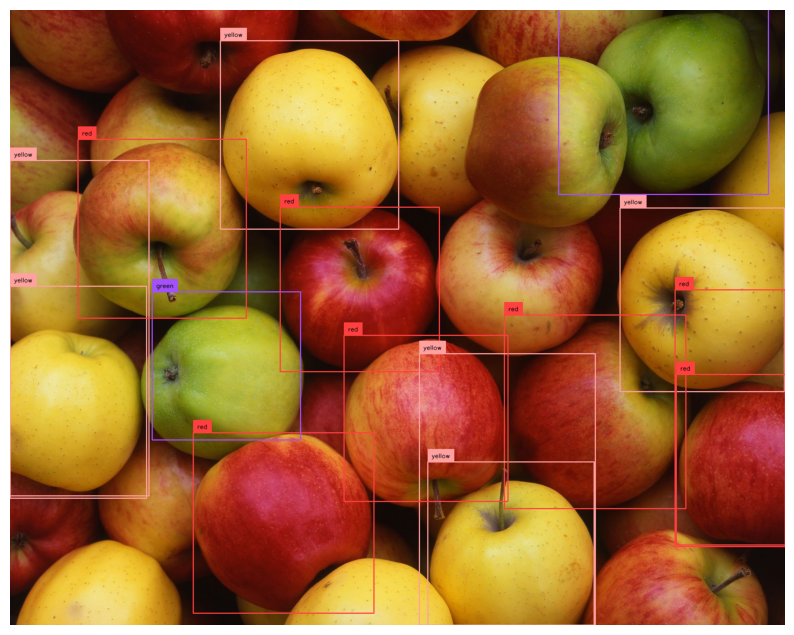

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

# Deploy to Hugging Face

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

api.upload_folder(
    folder_path=f"{HOME}/runs/detect/train",
    repo_id="tribber93/Apple-Classification-YoloV11",
    repo_type="model",
)

events.out.tfevents.1737113432.8bcbbf1fdbbf.1265.0:   0%|          | 0.00/278k [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

best.pt:   0%|          | 0.00/19.2M [00:00<?, ?B/s]

last.pt:   0%|          | 0.00/19.2M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/tribber93/Apple-Classification-YoloV11/commit/1a4318359c83dbeab1818d25c81825b0cabaf5fe', commit_message='Upload folder using huggingface_hub', commit_description='', oid='1a4318359c83dbeab1818d25c81825b0cabaf5fe', pr_url=None, repo_url=RepoUrl('https://huggingface.co/tribber93/Apple-Classification-YoloV11', endpoint='https://huggingface.co', repo_type='model', repo_id='tribber93/Apple-Classification-YoloV11'), pr_revision=None, pr_num=None)

In [ ]:
!zip -r apple-classification.zip {HOME}/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 21%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 34%)
  adding: content/runs/detect/train/events.out.tfevents.1737113432.8bcbbf1fdbbf.1265.0 (deflated 93%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 22%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 21%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 22%)
  adding: content/runs/detect/train/R_curve.png (deflated 18%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 21%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 22%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 46%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 17%)
  adding: content/runs/detect/train/results.png (deflated 7%)
  adding:

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.35 source={url}

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

100% 279k/279k [00:00<00:00, 391kB/s]
image 1/1 /content/ai_assignment_20230726_classify.jpeg: 512x640 2 greens, 7 reds, 6 yellows, 42.5ms
Speed: 2.9ms preprocess, 42.5ms inference, 591.6ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
